In [1]:
from __future__ import print_function, division
%matplotlib inline

In [22]:
import os
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

sns.set_style('white')

In [6]:
engine = create_engine('sqlite:///../data/residential.db')

In [7]:
df = pd.read_sql_table('2016', con=engine)

In [48]:
df = df[(df['Year-Built']>1850)&(df['Year-Built']<2017)].copy()
df = df[(df['Total Living Area']>50)].copy()
df['Current Total Value'] /= 1E6

In [43]:
df.head(1).to_clipboard(excel=True)

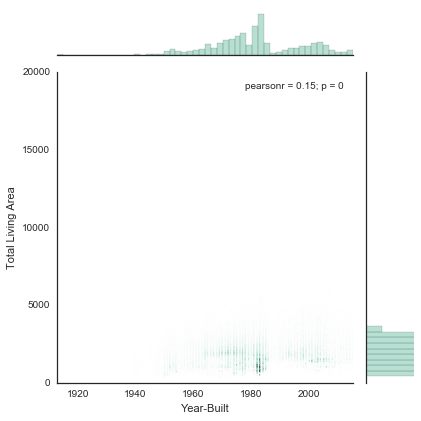

In [55]:
sns.jointplot(x='Year-Built', y='Total Living Area', kind="hex", color="#4CB391", data=df)
plt.ylim(0, 20E3)
plt.xlim(1900, 2016)
# plt.title('Anchorage Residential Properties')
plt.tight_layout()
plt.savefig('../viz/living area.pdf', dpi=400)

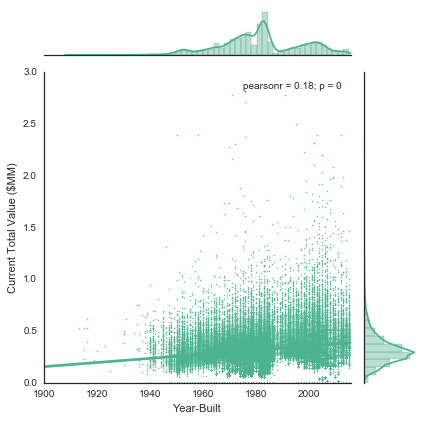

In [54]:
sns.jointplot(x='Year-Built', y='Current Total Value', kind="reg", color="#4CB391", data=df, scatter_kws={'s':2.25})
plt.ylim(0, 3)
plt.xlim(1900, 2016)
# plt.title('Anchorage Residential Properties')
plt.tight_layout()
plt.ylabel('Current Total Value ($MM)')
plt.savefig('../viz/current total value.pdf', dpi=400)

(0, 4)

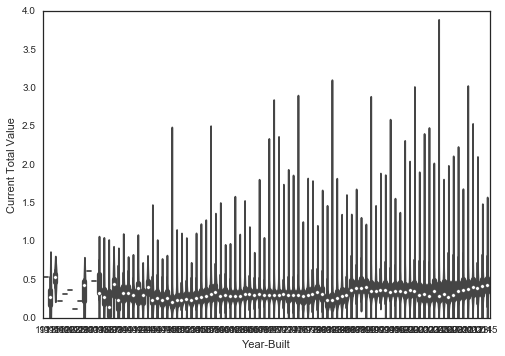

In [60]:
sns.violinplot(x='Year-Built', y='Current Total Value', data=df)
plt.ylim(0, 4)

In [63]:
df.sort_values(by='Current Total Value', ascending=False).to_csv('pricey.csv')